✅ 50 rows inserted into 'sales' table.

📊 Revenue by Product:
     product  total_qty  revenue
0     Coffee        111   445.73
1  Milkshake         76   345.45
2      Mocha         67   293.71
3      Juice         56   268.49
4        Tea         63   259.72
5      Latte         49   193.87
6       Soda         45   190.10
7   Smoothie         41   189.40
8  Green Tea         35   111.92


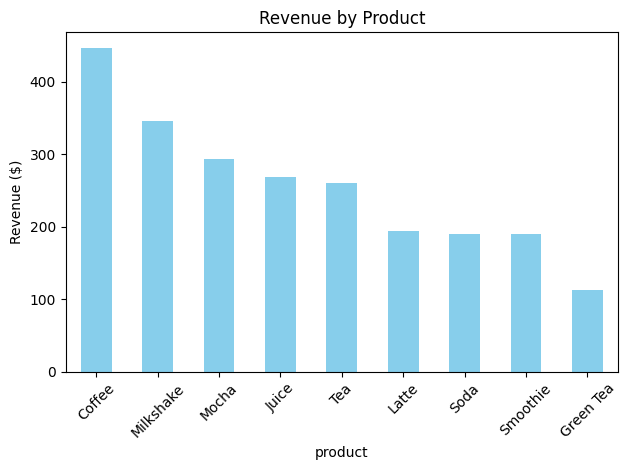


📈 Monthly Revenue Trend:
      month  monthly_revenue
0   2023-02            78.13
1   2023-03           191.80
2   2023-04           370.61
3   2023-05            23.85
4   2023-06           188.32
5   2023-07           309.97
6   2023-08           261.13
7   2023-09           455.98
8   2023-10            29.64
9   2023-11           287.72
10  2023-12           101.24


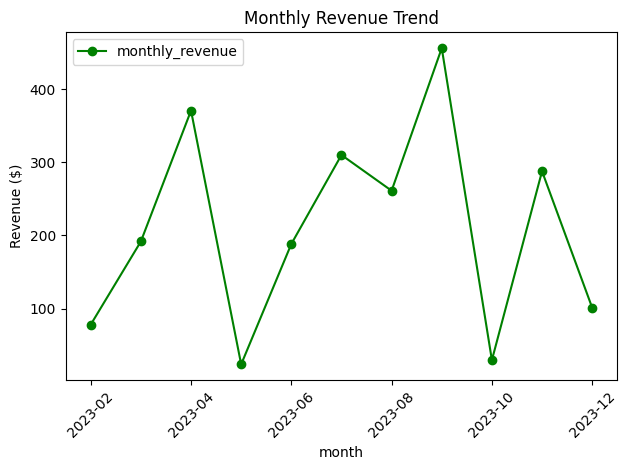


📅 Daily Revenue Trend:
     sale_date  daily_revenue
0   2023-02-02          38.72
1   2023-02-08          17.30
2   2023-02-19           5.80
3   2023-02-22          16.31
4   2023-03-03          18.40
5   2023-03-05          62.76
6   2023-03-15          36.08
7   2023-03-28          74.56
8   2023-04-01          38.08
9   2023-04-02          21.25
10  2023-04-06          69.92
11  2023-04-08          83.52
12  2023-04-09          88.63
13  2023-04-20          50.85
14  2023-04-22          18.36
15  2023-05-24          23.85
16  2023-06-22          99.28
17  2023-06-26          74.88
18  2023-06-30          14.16
19  2023-07-01          22.70
20  2023-07-02          42.77
21  2023-07-10          90.27
22  2023-07-16          39.42
23  2023-07-17          78.12
24  2023-07-18          29.82
25  2023-07-22           6.87
26  2023-08-05          39.04
27  2023-08-15          59.04
28  2023-08-17          63.00
29  2023-08-23          53.96
30  2023-08-31          46.09
31  2023-09-01  

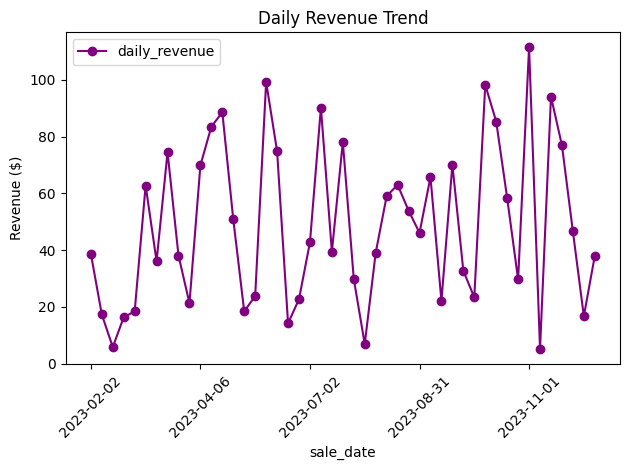


📆 Total Sales by Weekday:
  weekday_num    weekday  total_revenue
0           0     Sunday         282.68
1           1     Monday         320.23
2           2    Tuesday         209.98
3           3  Wednesday         382.16
4           4   Thursday         519.71
5           5     Friday         115.00
6           6   Saturday         468.63


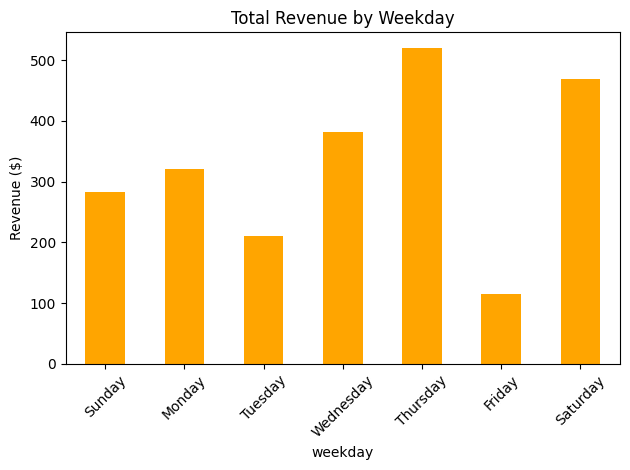


📅 First Sale Date per Product:
     product first_sale_date
0     Coffee      2023-02-02
1      Juice      2023-02-08
2  Green Tea      2023-02-19
3      Mocha      2023-03-15
4        Tea      2023-04-02
5   Smoothie      2023-04-08
6  Milkshake      2023-04-09
7       Soda      2023-06-22
8      Latte      2023-07-10


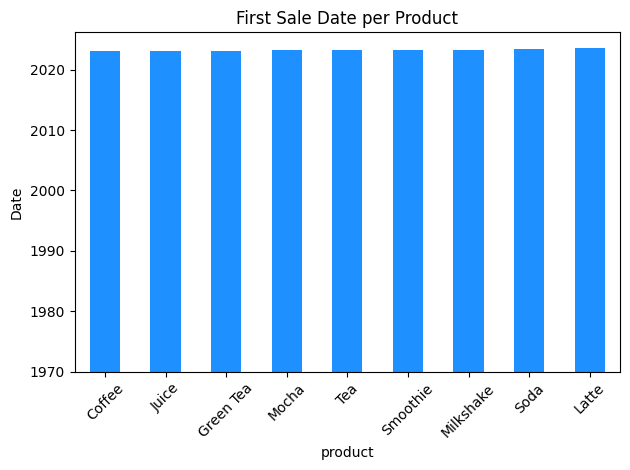

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop and recreate the sales table with a date column
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
    CREATE TABLE sales (
        product TEXT,
        quantity INTEGER,
        price REAL,
        sale_date DATE
    )
""")

# Generate 50 random sales entries with dates
products = ["Coffee", "Tea", "Smoothie", "Juice", "Soda", "Latte", "Cappuccino", "Mocha", "Green Tea", "Milkshake"]
data = []

start_date = datetime(2023, 1, 1)
for _ in range(50):
    product = random.choice(products)
    quantity = random.randint(1, 20)
    price = round(random.uniform(2.0, 6.0), 2)
    days_offset = random.randint(0, 365)
    sale_date = (start_date + timedelta(days=days_offset)).strftime("%Y-%m-%d")
    data.append((product, quantity, price, sale_date))

# Insert into table
cursor.executemany("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", data)
conn.commit()

print("✅ 50 rows inserted into 'sales' table.")

# Query 1: Revenue by Product
df_product = pd.read_sql_query("""
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
""", conn)

print("\n📊 Revenue by Product:")
print(df_product)

df_product.plot(kind="bar", x="product", y="revenue", color="skyblue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_by_product.png")
plt.show()

# Query 2: Monthly Revenue
df_month = pd.read_sql_query("""
SELECT
    STRFTIME('%Y-%m', sale_date) AS month,
    SUM(quantity * price) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month;
""", conn)

print("\n📈 Monthly Revenue Trend:")
print(df_month)

df_month.plot(kind="line", x="month", y="monthly_revenue", marker='o', color="green")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_revenue_trend.png")
plt.show()

# Query 3: Daily Revenue Trend
df_daily = pd.read_sql_query("""
SELECT
    sale_date,
    SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date;
""", conn)

print("\n📅 Daily Revenue Trend:")
print(df_daily)

df_daily.plot(kind="line", x="sale_date", y="daily_revenue", marker='o', color="purple")
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_revenue_trend.png")
plt.show()

# Query 4: Revenue by Weekday
df_weekday = pd.read_sql_query("""
SELECT
    STRFTIME('%w', sale_date) AS weekday_num,
    CASE STRFTIME('%w', sale_date)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS weekday,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY weekday_num
ORDER BY weekday_num;
""", conn)

print("\n📆 Total Sales by Weekday:")
print(df_weekday)

df_weekday.plot(kind="bar", x="weekday", y="total_revenue", color="orange", legend=False)
plt.title("Total Revenue by Weekday")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("weekday_revenue.png")
plt.show()

# Query 5: First Sale Date per Product
df_first_sales = pd.read_sql_query("""
SELECT
    product,
    MIN(sale_date) AS first_sale_date
FROM sales
GROUP BY product
ORDER BY first_sale_date;
""", conn)

print("\n📅 First Sale Date per Product:")
print(df_first_sales)

# Plot bar chart of first sale dates
df_first_sales['first_sale_date'] = pd.to_datetime(df_first_sales['first_sale_date'])
df_first_sales = df_first_sales.sort_values('first_sale_date')

df_first_sales.plot(kind='bar', x='product', y='first_sale_date', color='dodgerblue', legend=False)
plt.title("First Sale Date per Product")
plt.ylabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("first_sale_by_product.png")
plt.show()


# Close connection
conn.close()


In [4]:
# Export full sales table to CSV
# Connect to SQLite DB
conn = sqlite3.connect("sales_data.db") # Establish connection to the database.

df_export = pd.read_sql_query("SELECT * FROM sales", conn)
df_export.to_csv("generated_sales_data.csv", index=False)
print("\n📁 Dataset saved as 'generated_sales_data.csv'")
conn.close() # Close the connection after exporting the data.


📁 Dataset saved as 'generated_sales_data.csv'
